In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils



from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, Convolution3D , MaxPooling3D
from sklearn.metrics import roc_auc_score



Using TensorFlow backend.


In [57]:
B == D

True

In [424]:
def getSlices3d(arr,orient,imgSize,count):
    # var
    lower = 150-imgSize
    mid1 = int(lower/2.0)
    mid2 = 150-int(lower/2.0)

    # current: 5 slices each 4mm/pixel apart
    # count = number of slices in each direction
    # skip how many slices - every other one
    skip = 4
    # travel
    travel = count * skip
    # always an odd number of slices around the center slice
    if orient == "A": 
        arr1 = arr[(60-travel):(60+travel+1):skip,0:imgSize,0:imgSize]
        arr2 = arr[(60-travel):(60+travel+1):skip,0:imgSize,lower:150]
        arr3 = arr[(60-travel):(60+travel+1):skip,lower:150,lower:150]
        arr4 = arr[(60-travel):(60+travel+1):skip,lower:150,0:imgSize]
        #
        arr5 = arr[(75-travel):(75+travel+1):skip,mid1:mid2,mid1:mid2]
        #
        arr6 = arr[(90-travel):(90+travel+1):skip,0:imgSize,0:imgSize]
        arr7 = arr[(90-travel):(90+travel+1):skip,0:imgSize,lower:150]
        arr8 = arr[(90-travel):(90+travel+1):skip,lower:150,lower:150]
        arr9 = arr[(90-travel):(90+travel+1):skip,lower:150,0:imgSize]
        
        return  [arr5.reshape(count*2+1,imgSize,imgSize,1)]

    elif orient == "C":
        arr1 = arr[0:imgSize,(60-travel):(60+travel+1):skip,0:imgSize]
        arr2 = arr[0:imgSize,(60-travel):(60+travel+1):skip,lower:150]
        arr3 = arr[lower:150,(60-travel):(60+travel+1):skip,lower:150]
        arr4 = arr[lower:150,(60-travel):(60+travel+1):skip,0:imgSize]
        #
        arr5 = arr[mid1:mid2,(75-travel):(75+travel+1):skip,mid1:mid2]
        #
        arr6 = arr[0:imgSize,(90-travel):(90+travel+1):skip,0:imgSize]
        arr7 = arr[0:imgSize,(90-travel):(90+travel+1):skip,lower:150]
        arr8 = arr[lower:150,(90-travel):(90+travel+1):skip,lower:150]
        arr9 = arr[lower:150,(90-travel):(90+travel+1):skip,0:imgSize]
        
        return [  np.swapaxes(np.flipud (arr5) ,0,1).reshape(count*2+1,imgSize,imgSize,1) ]

    elif orient == "S":
        arr1 = arr[0:imgSize,0:imgSize,(60-travel):(60+travel+1):skip]
        arr2 = arr[0:imgSize,lower:150,(60-travel):(60+travel+1):skip]
        arr3 = arr[lower:150,lower:150,(60-travel):(60+travel+1):skip]
        arr4 = arr[lower:150,0:imgSize,(60-travel):(60+travel+1):skip]
        #
        arr5 = arr[mid1:mid2,mid1:mid2,(75-travel):(75+travel+1):skip]
        #
        arr6 = arr[0:imgSize,0:imgSize,(90-travel):(90+travel+1):skip]
        arr7 = arr[0:imgSize,lower:150,(90-travel):(90+travel+1):skip]
        arr8 = arr[lower:150,lower:150,(90-travel):(90+travel+1):skip]
        arr9 = arr[lower:150,0:imgSize,(90-travel):(90+travel+1):skip]

        return [np.swapaxes( np.rot90(arr5,3) , 0,2).reshape(count*2+1,imgSize,imgSize,1)]


def getSlices2d(arr,orient,imgSize):
    lower = 150-imgSize
    mid1 = int(lower/2.0)
    mid2 = 150-int(lower/2.0)

    if orient == "A":
        arr1 = arr[60,0:imgSize,0:imgSize]
        arr2 = arr[60,0:imgSize,lower:150]
        arr3 = arr[60,lower:150,lower:150]
        arr4 = arr[60,lower:150,0:imgSize]
        #
        arr5 = arr[75, mid1:mid2 , mid1:mid2 ]
        #
        arr6 = arr[90,0:imgSize,0:imgSize]
        arr7 = arr[90,0:imgSize,lower:150]
        arr8 = arr[90,lower:150,lower:150]
        arr9 = arr[90,lower:150,0:imgSize]
        
        return  arr5.reshape(imgSize,imgSize,1)

    elif orient == "C":
        arr1 = arr[0:imgSize,60,0:imgSize]
        arr2 = arr[0:imgSize,60,lower:150]
        arr3 = arr[lower:150,60,lower:150]
        arr4 = arr[lower:150,60,0:imgSize]
        #
        arr5 = arr[mid1:mid2,75,mid1:mid2]
        #
        arr6 = arr[0:imgSize,90,0:imgSize]
        arr7 = arr[0:imgSize,90,lower:150]
        arr8 = arr[lower:150,90,lower:150]
        arr9 = arr[lower:150,90,0:imgSize]
        
        return   np.flipud (arr5).reshape(imgSize,imgSize,1)   # np.swapaxes( ,0,1)

    elif orient == "S":
        arr1 = arr[0:imgSize,0:imgSize,60]
        arr2 = arr[0:imgSize,lower:150,60]
        arr3 = arr[lower:150,lower:150,60]
        arr4 = arr[lower:150,0:imgSize,60]
        #
        arr5 = arr[mid1:mid2,mid1:mid2,75]
        #
        arr6 = arr[0:imgSize,0:imgSize,90]
        arr7 = arr[0:imgSize,lower:150,90]
        arr8 = arr[lower:150,lower:150,90]
        arr9 = arr[lower:150,0:imgSize,90]
        
        return np.flipud (arr5).reshape(imgSize,imgSize,1) #  np.swapaxes( np.rot90(arr5,3) , 0,2).reshape(imgSize,imgSize,1)
        
#     return  [arr1.reshape(imgSize,imgSize,1) 
#             ,arr2.reshape(imgSize,imgSize,1) 
#             ,arr3.reshape(imgSize,imgSize,1) 
#             ,arr4.reshape(imgSize,imgSize,1) 
#             ,arr5.reshape(imgSize,imgSize,1)
#             ,arr6.reshape(imgSize,imgSize,1) 
#             ,arr7.reshape(imgSize,imgSize,1) 
#             ,arr8.reshape(imgSize,imgSize,1) 
#             ,arr9.reshape(imgSize,imgSize,1)]


# 
def getXandY():

    _augmentationFactor = 1
    # if train, do nothing
    # if validate or test
    if (bool):
        _augmentationFactor = 1

    arrList = []
    y = []
    clincical = []
    
    sample = ["lung1_43062", 'lung1_43421' , 'lung1_43370','lung1_43392' ,'lung1_43402'] # ,,,', ,,'
    
    for i in range (5):

        npy = '/home/ahmed/Dropbox/DFCI/kerasLungs/sample/' + sample[i] + '.npy'

        arr = np.load(npy)
        # X #

        arrList.append (  arr ) 
        
        # Y #
        y.extend ( [ int(i) for x in range (_augmentationFactor) ] )

        # now clinical
        clincicalVector = [ i , i , i ]
        clincical.extend( [clincicalVector for x in range(_augmentationFactor)] )

    # after loop
    arrList = np.array(arrList, 'float32')
    y = np.array(y, 'int8')
#     y = np_utils.to_categorical(y, 2)
    clincical = np.array(clincical , 'float32'  )
    return arrList,y,clincical




# MYGENERATOR

In [425]:
import random 
import scipy.ndimage as ndi

def offsetPatch(arr, finalSize):
    offset = (150-finalSize) / 2
    offsetEnd = 150-offset
    return arr[ offset:offsetEnd , offset:offsetEnd , offset:offsetEnd ]
    

def getMiniPatch(rand,arr,imgSize):
    lower = arr.shape[0] - imgSize
    maxi = arr.shape[0]
    mid1 = int(lower/2.0)
    mid2 = maxi-int(lower/2.0)
    
    if rand == 0:
        return arr[0:imgSize,0:imgSize,0:imgSize]
    elif rand == 1:
        return arr[0:imgSize,0:imgSize,lower:maxi]
    elif rand == 2:
        return arr[0:imgSize,lower:maxi,lower:maxi]  
    elif rand == 3:
        return arr[0:imgSize,lower:maxi,0:imgSize]  
    #
    elif rand == 4:
        return arr[mid1:mid2,mid1:mid2,mid1:mid2] 
    #
    elif rand == 5:
        return arr[lower:maxi,0:imgSize,0:imgSize]
    elif rand == 6:
        return arr[lower:maxi,0:imgSize,lower:maxi]
    elif rand == 7:
        return arr[lower:maxi,lower:maxi,lower:maxi]  
    elif rand == 8:
        return arr[lower:maxi,lower:maxi,0:imgSize]  

def transform_matrix_offset_center(matrix, x, y):
    o_x = float(x) / 2 + 0.5
    o_y = float(y) / 2 + 0.5
    offset_matrix = np.array([[1, 0, o_x], [0, 1, o_y], [0, 0, 1]])
    reset_matrix = np.array([[1, 0, -o_x], [0, 1, -o_y], [0, 0, 1]])
    transform_matrix = np.dot(np.dot(offset_matrix, matrix), reset_matrix)
    return transform_matrix


def apply_transform(x, transform_matrix, channel_axis=0, fill_mode='nearest', cval=0.):
    x = np.rollaxis(x, channel_axis, 0)
    final_affine_matrix = transform_matrix[:2, :2]
    final_offset = transform_matrix[:2, 2]
    channel_images = [ndi.interpolation.affine_transform(x_channel, final_affine_matrix,
                                                         final_offset, order=0, mode=fill_mode, cval=cval) for x_channel in x]
    x = np.stack(channel_images, axis=0)
    x = np.rollaxis(x, 0, channel_axis + 1)
    return x

def random_rotation(x, theta=90, row_axis=1, col_axis=2, channel_axis=0,
                    fill_mode='nearest', cval=0.):
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],
                                [np.sin(theta), np.cos(theta), 0],
                                [0, 0, 1]])

    h, w = x.shape[row_axis], x.shape[col_axis]
    transform_matrix = transform_matrix_offset_center(rotation_matrix, h, w)
    x = apply_transform(x, transform_matrix, channel_axis, fill_mode, cval)
    return x

def applyRotation(arr,theta):
    #
    out = np.copy(arr)
    #
    for i in range (arr.shape[0]):
        out[i] = random_rotation(out[i],theta = theta, 
                                 row_axis=0, col_axis=1, channel_axis=2, fill_mode='reflect', cval=0. )
    return  out

In [426]:
# runs every epoch
# augments, randmoizes and splits into batches.
def augmentAndSplit(x_train,y_train,clinical_train,finalSize,imgSize,count, batchSize):

    arr_a_list = []
    arr_s_list = []
    arr_c_list = []

    # loop through each patient.
    for arr in iter(x_train):

        # offset array to get a smaller one
        offsetArr = offsetPatch(arr, finalSize)

        # get miniPatch (0~9)
        randInt = random.randint(0,9)
        miniPatch = getMiniPatch(randInt,offsetArr,imgSize)

        # reshape to make channel
        miniPatch = miniPatch.reshape(imgSize,imgSize,imgSize,1)

        # flip bools
        flipBoolud = bool(random.getrandbits(1))
        flipBoolio = bool(random.getrandbits(1))
        flipBoolrl = bool(random.getrandbits(1))

        #
        if flipBoolud:
            miniPatch =  np.fliplr(miniPatch)    
        if flipBoolio:
            miniPatch =  np.flipud(miniPatch) 
        if flipBoolrl:
            miniPatch =  miniPatch[:,:,::-1]

        # rotation
        theta = np.pi / 180 * np.random.uniform(-180, 180)
        #
        miniPatch = applyRotation(miniPatch,theta) 

        # OTHER AUGMENTATIONS COME HERE

        # EXTRACT ORIENTATION SLICES
        skip = 4 # in mm or pixel
        travel = count * skip
        mid  = imgSize/2
        #
        arr_a_list.append( miniPatch [(mid-travel):(mid+travel+1):skip,:,:] )
        #
        arr_s = miniPatch [:,:,(mid-travel):(mid+travel+1):skip]
        arr_s_list.append( np.swapaxes( np.rot90(arr_s,3) , 0,2).reshape(count*2+1,imgSize,imgSize,1)  )
        #
        arr_c = miniPatch [:,(mid-travel):(mid+travel+1):skip,:]
        arr_c_list.append( np.swapaxes(np.flipud (arr_c) ,0,1).reshape(count*2+1,imgSize,imgSize,1) )
        
    # AFTER LOOP
    # RANDOMIZE
    idx = np.random.permutation( len(x_train))
    print idx
    # all is 5, batch size is 2, batch proper is 4, no of batches is 2
    batchProper = len(x_train) - (len(x_train)%batchSize) 
    noOfBatches = batchProper / batchSize
    # reorder all and take first batch*int entries i.e. leave remainder out, then split
    a_train = np.split  (   np.array( arr_a_list, 'float32') [idx] [:batchProper]   , noOfBatches )
    s_train = np.split  (   np.array( arr_s_list, 'float32') [idx] [:batchProper]   , noOfBatches )
    c_train = np.split  (   np.array( arr_c_list, 'float32') [idx] [:batchProper]   , noOfBatches )
    y_train = y_train[idx]
    clinical_train = clinical_train[idx]
    # all are arrays at this point
        
        
    #split into batches
    
        
    return a_train,s_train,c_train,y_train,clinical_train

def myGenerator(x_train,y_train,clinical_train,finalSize,imgSize,count,batchSize):

    while True:
        
        # these are acually lists of batches
        a_train,s_train,c_train,y_train,clinical_train = augmentAndSplit(x_train,y_train,clinical_train,
                                                                 finalSize,imgSize,count,batchSize)
        
        batches = 0
        for   _a_train,_s_train,_c_train,_y_train,_clinical_train in zip( 
            a_train,s_train,c_train,y_train,clinical_train ):

            yield [_clinical_train , _a_train , _s_train , _c_train ] , _y_train

            batches += 1
            if batches ==  len(a_train) :
                break

In [432]:
finalSize = 150
imgSize = 120
count = 2
batchSize = 2

x_train , y_train , clinical_train = getXandY()

# myGenerator(x_train,y_train,clinical_train,finalSize,imgSize,count,batchSize)


# 

In [433]:
x_train[0].shape

(150, 150, 150)

(120, 120, 120)


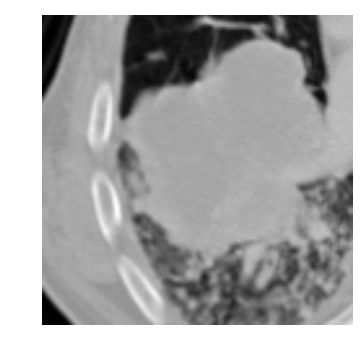

In [545]:
imgSize = 120
incoming = 150
arr = x_train[0]

offst_X = random.randint(0,incoming-imgSize)
offst_Y = random.randint(0,incoming-imgSize)
offst_Z = random.randint(0,incoming-imgSize)
out = arr[offst_X:imgSize+offst_X,offst_Y:imgSize+offst_Y,offst_Z:imgSize+offst_Z]

print out.shape

plt.imshow  ( out[60,:,:] , cmap=plt.cm.Greys_r)
plt.axis('off');

(120, 120, 120)


In [435]:


a = getSlices2d(arr,'A',120)
s = getSlices2d(arr,'S',120)
c = getSlices2d(arr,'C',120)

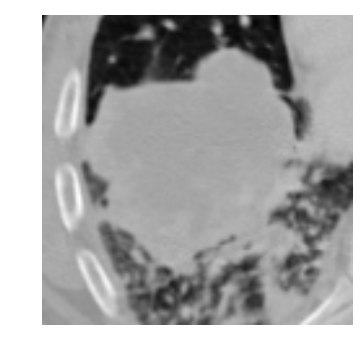

In [371]:
new[1]

array([[[[[-877.],
          [-925.],
          [-769.],
          ..., 
          [ 142.],
          [ 120.],
          [ 113.]],

         [[-920.],
          [-914.],
          [-623.],
          ..., 
          [ 154.],
          [ 136.],
          [ 133.]],

         [[-937.],
          [-833.],
          [-440.],
          ..., 
          [ 142.],
          [ 151.],
          [ 141.]],

         ..., 
         [[ -83.],
          [ -82.],
          [ -63.],
          ..., 
          [ -66.],
          [ -41.],
          [ -25.]],

         [[ -73.],
          [ -76.],
          [ -84.],
          ..., 
          [ -71.],
          [ -20.],
          [  -5.]],

         [[ -31.],
          [ -58.],
          [ -78.],
          ..., 
          [ -26.],
          [   0.],
          [   3.]]],


        [[[-841.],
          [-861.],
          [-943.],
          ..., 
          [ 139.],
          [ 130.],
          [ 123.]],

         [[-836.],
          [-904.],
          [-941.],
  

In [364]:
datagenTrain = ImageDataGenerator(
    #
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    #
    rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.4,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.4,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True, # randomly flip images
    # #
    # shear_range=0.,
    # zoom_range=0.,
    # channel_shift_range=0.,
    # #
    fill_mode='reflect',
    # cval=0.,
    # rescale=None,
    # dim_ordering=K.image_dim_ordering()
    )  


In [353]:
def createGenerator( a_train,y_train, batch_size, datagenTrain):

    while True:

        batches_A = datagenTrain.flow( a_train[0][:3], y_train, batch_size=batch_size , shuffle=False, seed = 1)
        

        
        for  batch_a , counter in zip( batches_A ,  np.arange(batch_size) ):

            yield [ batch_a ] 

            if counter >= batch_size:
                break

In [354]:
sika = createGenerator( a_train,y_train,2, datagenTrain)

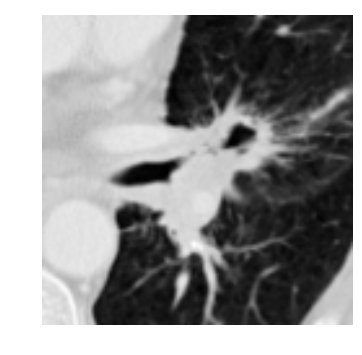

In [341]:
plt.imshow  ( arr_a_list[2][2].reshape(120,120) , cmap=plt.cm.Greys_r)
plt.axis('off');

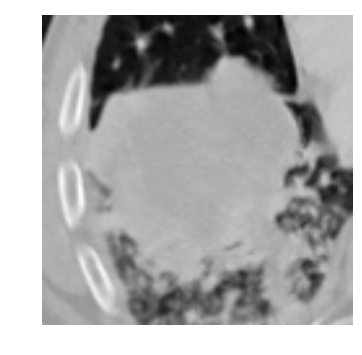

In [158]:
plt.imshow  ( miniPatch[60,:,:] , cmap=plt.cm.Greys_r)
plt.axis('off');

In [22]:
def manageDataFrames():
    trainList = ["lung1","lung3" ]  # , , , ,  ,"oncopanel" , "moffitt","moffittSpore"  ,"oncomap"
    validateList = ["lung2"]
    testList = ["nsclc_rt"]

    dataFrame = pd.DataFrame.from_csv('master_170228.csv', index_col = 0)
    dataFrame = dataFrame [ 
    ( pd.notnull( dataFrame["pathToData"] ) ) &
    ( pd.notnull( dataFrame["pathToMask"] ) ) &
    ( pd.notnull( dataFrame["stackMin"] ) ) &
    ( pd.notnull( dataFrame["histology"] ) ) & 
    ( pd.notnull( dataFrame["surv2yr"] ) ) &
    ( pd.notnull( dataFrame["surv1yr"] ) ) & 
    ( pd.notnull( dataFrame["stage"] ) ) &
    ( pd.notnull( dataFrame["age"] ) ) &
    ( pd.isnull( dataFrame["patch_failed"] ) )
    # & ( dataFrame["stage"] == 1.0 ) 
    ]
    dataFrame = dataFrame.reset_index(drop=True)
    print ("all patients: " , dataFrame.shape)
    #
    dataFrameTrain = dataFrame [ dataFrame["dataset"].isin(trainList) ]
    dataFrameTrain = dataFrameTrain.reset_index(drop=True)
    print ("train patients: " , dataFrameTrain.shape)
    #
    dataFrameValidate = dataFrame [ dataFrame["dataset"].isin(validateList) ]
    dataFrameValidate = dataFrameValidate.reset_index(drop=True)
    print ("validate patients: " , dataFrameValidate.shape)
    #
    dataFrameTest = dataFrame [ dataFrame["dataset"].isin(testList) ]
    dataFrameTest = dataFrameTest.reset_index(drop=True)
    print ("test patients: " , dataFrameTest.shape)

    return dataFrameTrain,dataFrameValidate,dataFrameTest



In [23]:
dataFrameTrain,dataFrameValidate,dataFrameTest = manageDataFrames()

('all patients: ', (1235, 32))
('train patients: ', (411, 32))
('validate patients: ', (107, 32))
('test patients: ', (528, 32))


In [37]:
len (  [ x for x in dataFrameTest.surv2yr.tolist() if x == 0.0 ] ) 

219

In [38]:
def make2dConvModel(imgSize):
    #(samples, rows, cols, channels) if dim_ordering='tf'.
    
    model = Sequential()

    model.add(Convolution2D(48, 5, 5, border_mode='same',dim_ordering='tf',input_shape=[imgSize,imgSize,1] )) # 32
    model.add(Activation('relu'))

    model.add(Convolution2D(48, 5, 5)) # 32
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Convolution2D(96, 5, 5, border_mode='same')) # 64
    model.add(Activation('relu'))

    model.add(Convolution2D(96, 5, 5)) # 64
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512)) # 512
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    return model

In [39]:
modo = make2dConvModel(120)

In [40]:
modo.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_11 (Convolution2D) (None, 120, 120, 48)  1248        convolution2d_input_3[0][0]      
____________________________________________________________________________________________________
activation_13 (Activation)       (None, 120, 120, 48)  0           convolution2d_11[0][0]           
____________________________________________________________________________________________________
convolution2d_12 (Convolution2D) (None, 116, 116, 48)  57648       activation_13[0][0]              
____________________________________________________________________________________________________
activation_14 (Activation)       (None, 116, 116, 48)  0           convolution2d_12[0][0]           
___________________________________________________________________________________________

In [67]:
def make3dConvModel(imgSize,count):
    #(samples, rows, cols, channels) if dim_ordering='tf'.
    
    model = Sequential()

    model.add(Convolution3D(48, 2, 5, 5, border_mode='same',dim_ordering='tf',input_shape=[count*2+1,imgSize,imgSize,1] )) # 32
    model.add(Activation('relu'))

    model.add(Convolution3D(48, 2, 5, 5)) # 32
    model.add(Activation('relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2))) ### 
    model.add(Dropout(0.25))

    model.add(Convolution3D(96, 2, 5, 5, border_mode='same')) # 64
    model.add(Activation('relu'))

    model.add(Convolution3D(96, 1, 5 , 5)) # 64
    model.add(Activation('relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(512)) # 512
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    return model

modo1 = make3dConvModel(80,3)
modo1.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution3d_93 (Convolution3D) (None, 7, 80, 80, 48) 2448        convolution3d_input_27[0][0]     
____________________________________________________________________________________________________
activation_113 (Activation)      (None, 7, 80, 80, 48) 0           convolution3d_93[0][0]           
____________________________________________________________________________________________________
convolution3d_94 (Convolution3D) (None, 6, 76, 76, 48) 115248      activation_113[0][0]             
____________________________________________________________________________________________________
activation_114 (Activation)      (None, 6, 76, 76, 48) 0           convolution3d_94[0][0]           
___________________________________________________________________________________________

In [32]:
npy = '/home/ahmed/Dropbox/DFCI/kerasLungs/sample/' + "lung1_43062" + '.npy'
arr = np.load(npy)
arr.shape

(150, 150, 150)

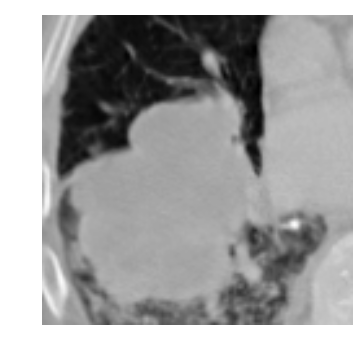

In [123]:
plt.imshow  ( miniPatch[60,:,:] , cmap=plt.cm.Greys_r)
plt.axis('off');

In [12]:
np.rot90(x_train_s[0]).shape

(120, 5, 120, 1)

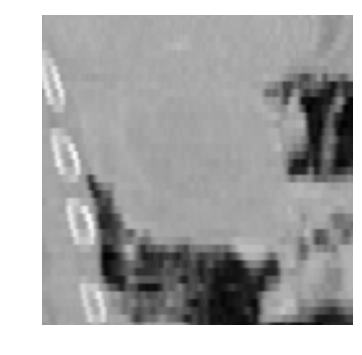

In [64]:
plt.imshow  ( arr[15:135,75,15:135 ] , cmap=plt.cm.Greys_r)
plt.axis('off');
plt.savefig("c.jpg")

In [652]:
def applyRotationToDepth(arr):
    #
    out_clockwise = np.copy(arr)
    out_anticlockwise = np.copy(arr)
    #
    # define rotations thetas in radians
    theta_clockwise = np.pi / 180 * (90)
    theta_anticlockwise = np.pi / 180 * (-90)
    #
    for i in range (arr.shape[0]):
        #
        out_clockwise[i] = random_rotation(out_clockwise[i],theta = theta_clockwise, row_axis=0, col_axis=1, channel_axis=2, fill_mode='reflect', cval=0. )
        # 
        out_anticlockwise[i] = random_rotation(out_anticlockwise[i],theta = theta_anticlockwise, row_axis=0, col_axis=1, channel_axis=2, fill_mode='reflect', cval=0. )
        
    return [ out_clockwise , out_anticlockwise ]

In [412]:

def makeSingle3dConvModel(imgSize,skip):
    # (samples, conv_dim1, conv_dim2, conv_dim3, channels) if dim_ordering='tf'.

    model = Sequential()

    conv_filt = 3
    conv_filt_depth = 2
    init = "he_normal"
    #

    # input = (samples, count*2+1,imgSize,imgSize,1 )
    model.add(Convolution3D(32, conv_filt_depth , conv_filt, conv_filt, init = init , border_mode='same',dim_ordering='tf' ,input_shape=[imgSize/skip,imgSize/skip,imgSize/skip,1]  , activation='relu')) # 32
    # output (samples, count*2+1,imgSize,imgSize, nb_filter)

    model.add( Convolution3D( 48, conv_filt_depth , conv_filt, conv_filt,init = init , border_mode='same' , activation='relu' , dim_ordering='tf'  ) ) # 32
    model.add( MaxPooling3D( pool_size=(3, 2, 2) , dim_ordering='tf'  ) )
    model.add( Dropout(0.5) )

    model.add(Convolution3D(96, conv_filt_depth , conv_filt, conv_filt, init = init , border_mode='same' , activation='relu'   , dim_ordering='tf' )) # 64

    model.add(Convolution3D(128, conv_filt_depth , conv_filt, conv_filt, init = init , border_mode='same' , activation='relu'  , dim_ordering='tf'  )) # 64
    model.add(MaxPooling3D(pool_size=(3, 2, 2) , dim_ordering='tf' ))
    model.add(Dropout(0.5))
    
    # model.add(Convolution3D(192, conv_filt_depth , conv_filt, conv_filt,  border_mode='same' , activation='relu'  , dim_ordering='tf'  )) # 64   

    model.add(Flatten())
    model.add( Dense(512 , activation='relu' ) ) # 512
    model.add(Dropout(0.5))
    
    return model

modo = makeSingle3dConvModel(120,3)
modo.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution3d_78 (Convolution3D) (None, 40, 40, 40, 48 912         convolution3d_input_17[0][0]     
____________________________________________________________________________________________________
convolution3d_79 (Convolution3D) (None, 40, 40, 40, 48 41520       convolution3d_78[0][0]           
____________________________________________________________________________________________________
maxpooling3d_33 (MaxPooling3D)   (None, 13, 20, 20, 48 0           convolution3d_79[0][0]           
____________________________________________________________________________________________________
dropout_49 (Dropout)             (None, 13, 20, 20, 48 0           maxpooling3d_33[0][0]            
___________________________________________________________________________________________

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution3d_6 (Convolution3D)  (None, 60, 60, 60, 48 912         convolution3d_input_2[0][0]      
____________________________________________________________________________________________________
convolution3d_7 (Convolution3D)  (None, 60, 60, 60, 48 41520       convolution3d_6[0][0]            
____________________________________________________________________________________________________
maxpooling3d_3 (MaxPooling3D)    (None, 20, 30, 30, 48 0           convolution3d_7[0][0]            
____________________________________________________________________________________________________
dropout_4 (Dropout)              (None, 20, 30, 30, 48 0           maxpooling3d_3[0][0]             
___________________________________________________________________________________________

In [654]:
def applyIntToDepth(arr):
    #
    out = np.copy(arr)
    #

    #
    for i in range (arr.shape[0]):
    
        #
        out[i] = random_shear(out[i], 1000, row_axis=1, col_axis=2, channel_axis=0,
                 fill_mode='nearest', cval=0.)
        # 

    return  out

NameError: global name 'np_utils' is not defined

In [656]:
def applyRotation(arr,theta):
    #
    out = np.copy(arr)
    #
    for i in range (arr.shape[0]):
        out[i] = random_rotation(out[i],theta = theta, row_axis=0, col_axis=1, channel_axis=2, fill_mode='reflect', cval=0. )
    return  out
    
import random




def myGenerator(batch_size,x_train_a,x_train_s,x_train_c):
    
    #
    x_train_a_aug = []
    x_train_s_aug = []
    x_train_c_aug = []
    #
    idx = np.random.permutation( x_train_a.shape[0])
    # get Y and clinical at same random idx



    # lets augment  # - x_train_a.shape[0]%batch_size
    for k in range ( x_train_a.shape[0] ): 
        #
        out_a = np.copy(x_train_a[k])
        out_s = np.copy(x_train_s[k])
        out_c = np.copy(x_train_c[k])

        #
        out_a = applyRotation(out_a,theta)
        out_s = applyRotation(out_s,theta)
        out_c = applyRotation(out_c,theta)

        # add to list
        x_train_a_aug.append(out_a)
        x_train_s_aug.append(out_s)
        x_train_c_aug.append(out_c)

    return x_train_a_aug , x_train_s_aug , x_train_c_aug
        

In [657]:
x_train_a , x_train_s , x_train_c  = getXandY()
x_train_a.shape

x_train_a_aug , x_train_s_aug , x_train_c_aug = myGenerator(4,x_train_a,x_train_s,x_train_c)

9

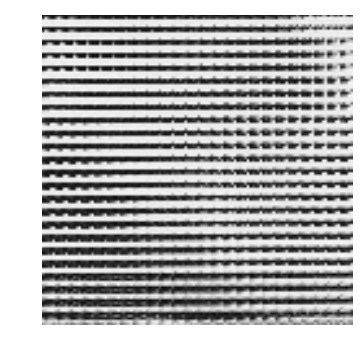

In [582]:


def make3dConvModel(imgSize,count):
    # (samples, conv_dim1, conv_dim2, conv_dim3, channels) if dim_ordering='tf'.

    model = Sequential()

    conv_filt = 3
    conv_filt_depth = 2

    # input = (samples, count*2+1,imgSize,imgSize,1 )
    model.add(Convolution3D(48, conv_filt_depth , conv_filt, conv_filt, border_mode='same',dim_ordering='tf' ,input_shape=[count*2+1,imgSize,imgSize,1]  , activation='relu')) # 32
    # output (samples, count*2+1,imgSize,imgSize, nb_filter)

    model.add( Convolution3D( 48, conv_filt_depth , conv_filt, conv_filt, border_mode='same' , activation='relu' , dim_ordering='tf'  ) ) # 32
    model.add( MaxPooling3D( pool_size=(2, 3, 3) , dim_ordering='tf'  ) )
    model.add( Dropout(0.5) )

    model.add(Convolution3D(96, conv_filt_depth , conv_filt, conv_filt,  border_mode='same' , activation='relu'   , dim_ordering='tf' )) # 64

    model.add(Convolution3D(96, conv_filt_depth , conv_filt, conv_filt,  border_mode='same' , activation='relu'  , dim_ordering='tf'  )) # 64
    model.add(MaxPooling3D(pool_size=(2, 3, 3) , dim_ordering='tf' ))
    model.add(Dropout(0.5))
    
    model.add(Convolution3D(192, conv_filt_depth , conv_filt, conv_filt,  border_mode='same' , activation='relu'  , dim_ordering='tf'  )) # 64   

    model.add(Flatten())
    model.add( Dense(512 , activation='relu' ) ) # 512
    model.add(Dropout(0.5))
    
    return model

In [651]:
def random_rotation(x, theta=90, row_axis=1, col_axis=2, channel_axis=0,
                    fill_mode='nearest', cval=0.):
    """Performs a random rotation of a Numpy image tensor.
    # Arguments
        x: Input tensor. Must be 3D.
        rg: Rotation range, in degrees.
        row_axis: Index of axis for rows in the input tensor.
        col_axis: Index of axis for columns in the input tensor.
        channel_axis: Index of axis for channels in the input tensor.
        fill_mode: Points outside the boundaries of the input
            are filled according to the given mode
            (one of `{'constant', 'nearest', 'reflect', 'wrap'}`).
        cval: Value used for points outside the boundaries
            of the input if `mode='constant'`.
    # Returns
        Rotated Numpy image tensor.
    """
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],
                                [np.sin(theta), np.cos(theta), 0],
                                [0, 0, 1]])

    h, w = x.shape[row_axis], x.shape[col_axis]
    transform_matrix = transform_matrix_offset_center(rotation_matrix, h, w)
    x = apply_transform(x, transform_matrix, channel_axis, fill_mode, cval)
    return x


def random_shift(x, wrg, hrg, row_axis=1, col_axis=2, channel_axis=0,
                 fill_mode='nearest', cval=0.):
    """Performs a random spatial shift of a Numpy image tensor.
    # Arguments
        x: Input tensor. Must be 3D.
        wrg: Width shift range, as a float fraction of the width.
        hrg: Height shift range, as a float fraction of the height.
        row_axis: Index of axis for rows in the input tensor.
        col_axis: Index of axis for columns in the input tensor.
        channel_axis: Index of axis for channels in the input tensor.
        fill_mode: Points outside the boundaries of the input
            are filled according to the given mode
            (one of `{'constant', 'nearest', 'reflect', 'wrap'}`).
        cval: Value used for points outside the boundaries
            of the input if `mode='constant'`.
    # Returns
        Shifted Numpy image tensor.
    """
    h, w = x.shape[row_axis], x.shape[col_axis]
    tx = np.random.uniform(-hrg, hrg) * h
    ty = np.random.uniform(-wrg, wrg) * w
    translation_matrix = np.array([[1, 0, tx],
                                   [0, 1, ty],
                                   [0, 0, 1]])

    transform_matrix = translation_matrix  # no need to do offset
    x = apply_transform(x, transform_matrix, channel_axis, fill_mode, cval)
    return x


def random_shear(x, intensity, row_axis=1, col_axis=2, channel_axis=0,
                 fill_mode='nearest', cval=0.):
    """Performs a random spatial shear of a Numpy image tensor.
    # Arguments
        x: Input tensor. Must be 3D.
        intensity: Transformation intensity.
        row_axis: Index of axis for rows in the input tensor.
        col_axis: Index of axis for columns in the input tensor.
        channel_axis: Index of axis for channels in the input tensor.
        fill_mode: Points outside the boundaries of the input
            are filled according to the given mode
            (one of `{'constant', 'nearest', 'reflect', 'wrap'}`).
        cval: Value used for points outside the boundaries
            of the input if `mode='constant'`.
    # Returns
        Sheared Numpy image tensor.
    """
    shear = np.random.uniform(-intensity, intensity)
    shear_matrix = np.array([[1, -np.sin(shear), 0],
                             [0, np.cos(shear), 0],
                             [0, 0, 1]])

    h, w = x.shape[row_axis], x.shape[col_axis]
    transform_matrix = transform_matrix_offset_center(shear_matrix, h, w)
    x = apply_transform(x, transform_matrix, channel_axis, fill_mode, cval)
    return x


def random_zoom(x, zoom_range, row_axis=1, col_axis=2, channel_axis=0,
                fill_mode='nearest', cval=0.):
    """Performs a random spatial zoom of a Numpy image tensor.
    # Arguments
        x: Input tensor. Must be 3D.
        zoom_range: Tuple of floats; zoom range for width and height.
        row_axis: Index of axis for rows in the input tensor.
        col_axis: Index of axis for columns in the input tensor.
        channel_axis: Index of axis for channels in the input tensor.
        fill_mode: Points outside the boundaries of the input
            are filled according to the given mode
            (one of `{'constant', 'nearest', 'reflect', 'wrap'}`).
        cval: Value used for points outside the boundaries
            of the input if `mode='constant'`.
    # Returns
        Zoomed Numpy image tensor.
    # Raises
        ValueError: if `zoom_range` isn't a tuple.
    """
    if len(zoom_range) != 2:
        raise ValueError('zoom_range should be a tuple or list of two floats. '
                         'Received arg: ', zoom_range)

    if zoom_range[0] == 1 and zoom_range[1] == 1:
        zx, zy = 1, 1
    else:
        zx, zy = np.random.uniform(zoom_range[0], zoom_range[1], 2)
    zoom_matrix = np.array([[zx, 0, 0],
                            [0, zy, 0],
                            [0, 0, 1]])

    h, w = x.shape[row_axis], x.shape[col_axis]
    transform_matrix = transform_matrix_offset_center(zoom_matrix, h, w)
    x = apply_transform(x, transform_matrix, channel_axis, fill_mode, cval)
    return x


def random_channel_shift(x, intensity, channel_axis=0):
    x = np.rollaxis(x, channel_axis, 0)
    min_x, max_x = np.min(x), np.max(x)
    channel_images = [np.clip(x_channel + np.random.uniform(-intensity, intensity), min_x, max_x)
                      for x_channel in x]
    x = np.stack(channel_images, axis=0)
    x = np.rollaxis(x, 0, channel_axis + 1)
    return x




def transform_matrix_offset_center(matrix, x, y):
    o_x = float(x) / 2 + 0.5
    o_y = float(y) / 2 + 0.5
    offset_matrix = np.array([[1, 0, o_x], [0, 1, o_y], [0, 0, 1]])
    reset_matrix = np.array([[1, 0, -o_x], [0, 1, -o_y], [0, 0, 1]])
    transform_matrix = np.dot(np.dot(offset_matrix, matrix), reset_matrix)
    return transform_matrix


def apply_transform(x, transform_matrix, channel_axis=0, fill_mode='nearest', cval=0.):
    x = np.rollaxis(x, channel_axis, 0)
    final_affine_matrix = transform_matrix[:2, :2]
    final_offset = transform_matrix[:2, 2]
    channel_images = [ndi.interpolation.affine_transform(x_channel, final_affine_matrix,
                                                         final_offset, order=0, mode=fill_mode, cval=cval) for x_channel in x]
    x = np.stack(channel_images, axis=0)
    x = np.rollaxis(x, 0, channel_axis + 1)
    return x

In [583]:
modo = make3dConvModel(108,2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution3d_92 (Convolution3D) (None, 5, 108, 108, 4 912         convolution3d_input_23[0][0]     
____________________________________________________________________________________________________
convolution3d_93 (Convolution3D) (None, 5, 108, 108, 4 41520       convolution3d_92[0][0]           
____________________________________________________________________________________________________
maxpooling3d_42 (MaxPooling3D)   (None, 2, 36, 36, 48) 0           convolution3d_93[0][0]           
____________________________________________________________________________________________________
dropout_61 (Dropout)             (None, 2, 36, 36, 48) 0           maxpooling3d_42[0][0]            
___________________________________________________________________________________________

In [533]:
convo1 = modo.layers[0]

In [544]:
convo1.output_shape


(None, 5, 120, 120, 64)

(9, 5, 120, 120, 1)

In [497]:
x_train_a[0][0].shape

(120, 120, 1)

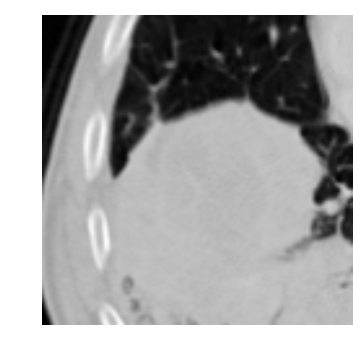

In [498]:
sikos = applyIntToDepth(x_train_a[0] )
sikos.shape
plt.imshow  (  sikos[0]  .reshape(120,120) , cmap=plt.cm.Greys_r)
plt.axis('off');

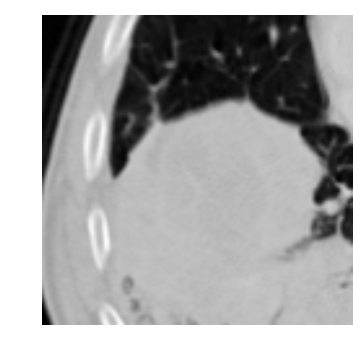

In [494]:
plt.imshow  (  x_train_a[0][0]  .reshape(120,120) , cmap=plt.cm.Greys_r)
plt.axis('off');

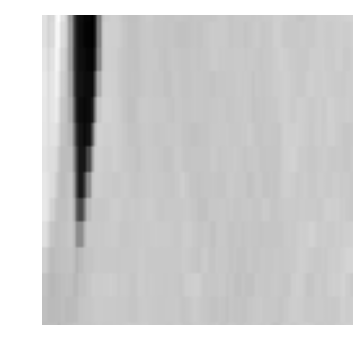

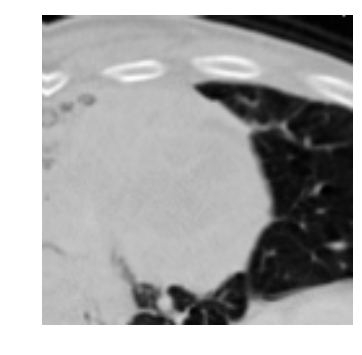

In [388]:
plt.imshow  (  sikos[0]  .reshape(120,120) , cmap=plt.cm.Greys_r)
plt.axis('off');

In [236]:
scipy.ndimage.interpolation.rotate(input, angle, axes=(1, 0), reshape=True, output=None, order=3, mode='constant', cval=0.0, prefilter=True)

NameError: name 'scipy' is not defined

In [154]:
def centerAndStandardizeTraining(arr):
    out = arr
    #
    mean = np.mean(out,axis=(0) )
    print mean.shape
    std = np.std(out,axis=(0) )
    print std.shape
    # 
    out -= mean
    out /= (std + np.finfo(float).eps )
    #
    return mean,std,out

In [155]:
cen = centerAndStandardizeTraining(x_train_a)

(120, 120, 1)
(120, 120, 1)


In [136]:
# flip all direction
def flipAllThreeDirections(arr):
    flip_ud = np.fliplr(arr) 
    flip_io = np.flipud(arr) 
    flip_rl = arr[:,:,::-1]
    return [flip_ud , flip_io , flip_rl]
    
# adds original, then adds augmented - changes structure (doesnt append at end)
def augmentTraining(arr_a,arr_s,arr_c):
    out_a = []
    out_s = []
    out_c = []
    # loop
    for k in range (arr_a.shape[0]):
        # Axial
        # append original
        out_a.append( arr_a[k] )
        # extend augemented
        out_a.extend(  flipAllThreeDirections(arr_a[k])  )
        
        # Sagittal
        # append original
        out_s.append( arr_s[k] )
        # extend augemented
        out_s.extend(  flipAllThreeDirections(arr_s[k])  )
        
        # Coronal
        # append original
        out_c.append( arr_c[k] )
        # extend augemented
        out_c.extend(  flipAllThreeDirections(arr_c[k])  )
        
        
    return np.array (out_a , 'float32' )  , np.array (out_s , 'float32' )  , np.array (out_c , 'float32' ) 

In [137]:
a , s , c  = augmentTraining( x_train_a , x_train_s , x_train_c  )

In [140]:
c.shape

(36, 5, 120, 120, 1)

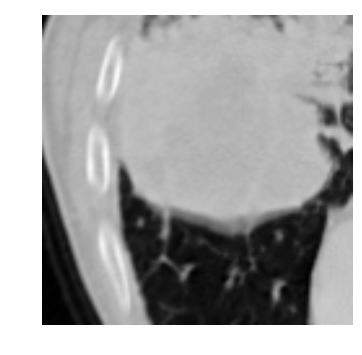

In [160]:
plt.imshow(np.flipud(x_train_a[0])  .reshape(120,120) , cmap=plt.cm.Greys_r)
plt.axis('off');

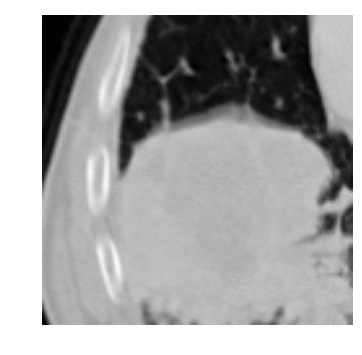

In [158]:
plt.imshow(np.fliplr(x_train_a[0])  .reshape(120,120) , cmap=plt.cm.Greys_r)
plt.axis('off');

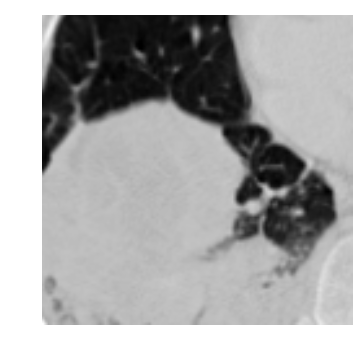

In [145]:
plt.imshow(a[4][0,:,:,:].reshape(120,120) , cmap=plt.cm.Greys_r)
plt.axis('off');


In [33]:
#
#
#
#
#
# operate on each orientation seperately
def centerAndStandardize(arr):
    out = arr
    #
    mean = np.mean(out,axis=(0) )
    std = np.std(out,axis=(0) )
    # 
    out -= mean
    out /= (std + np.finfo(float).eps )
    
    return mean,std,out

In [34]:
mean,std,out = centerAndStandardize(x_train_a)

In [39]:
out[0,0,0,0,0]

-0.86683702

In [31]:
center.shape

(9, 5, 120, 120, 1)

In [26]:
np.std( [ x_train_a[k,0,0,0,0] for k in range(x_train_a.shape[0]) ])

471.06122

In [29]:
x_train_a[0,0,0,0,0]

-997.0

In [30]:
mean[0,0,0,0]

-588.66669

In [32]:
center[0,0,0,0,0]


-408.33331

In [5]:
print myData.shape

datagenTrain = ImageDataGenerator(
featurewise_center=True, 
featurewise_std_normalization=True,
samplewise_center=False,
samplewise_std_normalization=False) 

datagenTrain.fit(myData) 
print datagenTrain.mean
print datagenTrain.std

(9, 5, 120, 120, 1)


ValueError: Input to `.fit()` should have rank 4. Got array with shape: (9, 5, 120, 120, 1)

In [103]:
datagenTrain.std


array([[[ 356.71228027]]], dtype=float32)

In [81]:
testa =  [ float(x_train_a[k,0,0]) for k in range (x_train_a.shape[0]) ]
print testa

[-1007.0, 23.0, 83.0, -973.0, -886.0, -1000.0, -88.0, 186.0, -1004.0]


In [82]:
mean = np.mean(testa)
print mean
std = np.std(testa)
final = (testa - mean) / std
final

-518.444444444


array([-0.94915645,  1.05190798,  1.16847484, -0.88310189, -0.71407995,
       -0.93555698,  0.83625929,  1.36858128, -0.9433281 ])

In [90]:
normArr = featurewiseCenterAndStd(x_train_a)
normArr.shape

[-145.6569519]
[[[-145.6569519]]]


(9, 120, 120, 1)

In [94]:
x_train_a - [-145.6569519]

array([[[[ 143.24228024],
         [ 143.26470732],
         [ 143.2871344 ],
         ..., 
         [ 146.58110553],
         [ 146.56989204],
         [ 146.51662778]],

        [[ 143.2310667 ],
         [ 143.2310667 ],
         [ 143.26751065],
         ..., 
         [ 146.54185825],
         [ 146.55307173],
         [ 146.54466158]],

        [[ 143.261904  ],
         [ 143.22265672],
         [ 143.2310667 ],
         ..., 
         [ 146.54466158],
         [ 146.53064471],
         [ 146.50821769]],

        ..., 
        [[ 143.27031397],
         [ 143.91228807],
         [ 145.28594407],
         ..., 
         [ 145.59711923],
         [ 145.21585959],
         [ 145.20184269]],

        [[ 143.19462275],
         [ 143.51140475],
         [ 144.68602079],
         ..., 
         [ 145.89988425],
         [ 145.29996097],
         [ 145.2130562 ]],

        [[ 143.20022964],
         [ 143.34039855],
         [ 144.15618205],
         ..., 
         [ 146.02042958],
  

In [69]:
algo =  [ float(normArr[k,0,0]) for k in range (normArr.shape[0]) ]
print algo

[-2.4146716594696045, 0.47280949354171753, 0.6410122513771057, -2.319356679916382, -2.075462579727173, -2.395047903060913, 0.16163434088230133, 0.9297603964805603, -2.406261444091797]


In [85]:
a = np.array([[1, 2], 
              [3, 4]])
print np.mean(a)

print np.mean(a, axis=0)

print np.mean(a, axis=1)

print np.mean(a, axis=(0,1))

2.5
[ 2.  3.]
[ 1.5  3.5]
2.5


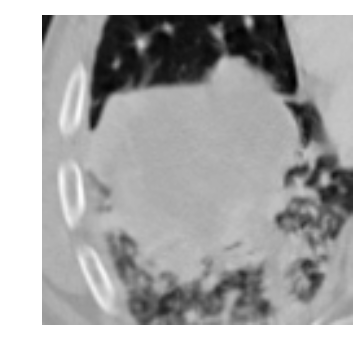

In [48]:
plt.imshow(normArr[4,:,:,:].reshape(120,120) , cmap=plt.cm.Greys_r)
plt.axis('off');

# TEST K.FUNCTION

In [1]:
import tensorflow as tf
from keras import backend as K
from keras.models import model_from_json

RUN = "11"
# get the model
# load json and create model
json_file = open( "/home/ahmed/Dropbox/DFCI/11_AWS_output/output/" + RUN + '_json.json' , 'r')
loaded_model_json = json_file.read()
json_file.close()
myModel = model_from_json(loaded_model_json)
# load weights into new model
myModel.load_weights("/home/ahmed/Dropbox/DFCI/11_AWS_output/output/" + RUN + "_model.h5")

Using TensorFlow backend.


In [5]:
myModel.layers[2].output

<tf.Tensor 'add_17:0' shape=(?, 2) dtype=float32>

In [34]:
# merge,dense1=512/256,dense=2,activation=softmax2
dense2 = myModel.layers[2]


seq_clinical = myModel.layers[0].layers[0]
seq_a = myModel.layers[0].layers[1]
seq_s = myModel.layers[0].layers[2]
seq_c = myModel.layers[0].layers[3]


get_logits = K.function([ seq_clinical.input , seq_a.input , seq_s.input , seq_c.input ], [ dense2.output ] )



In [35]:
[ seq_clinical.input , seq_a.input , seq_s.input , seq_c.input ]

[<tf.Tensor 'dense_input_2:0' shape=(?, 3) dtype=float32>,
 <tf.Tensor 'convolution2d_input_4:0' shape=(?, 120, 120, 1) dtype=float32>,
 <tf.Tensor 'convolution2d_input_5:0' shape=(?, 120, 120, 1) dtype=float32>,
 <tf.Tensor 'convolution2d_input_6:0' shape=(?, 120, 120, 1) dtype=float32>]

In [117]:

myModel.layers[0].layers

In [97]:
sample = ["lung1_43062", 'lung1_43421' , 'lung1_43370','lung1_43392' ,'lung1_43402'] 
arrs = []
for i in iter(sample):
    npy1 = '/home/ahmed/Dropbox/DFCI/kerasLungs/sample/' + i + '.npy'
    arr1 = np.load(npy1)
    arrs.append(arr1)

arrs = np.array(arrs)

a= np.array([5,6,7])
b = np.array([2,4,5])
clinical = np.array([a,b,a,b,a],'float32')

In [98]:
arr_a_list = []
arr_s_list = []
arr_c_list = []

# loop through each patient.
for arr in iter(arrs):
    
    axial =  arr[75,15:135,15:135].reshape(120,120,1)
    sagittal =  arr[15:135,75,15:135].reshape(120,120,1)
    coronal =  arr[15:135,15:135,75].reshape(120,120,1)
    
    arr_a_list.append(axial )
    arr_s_list.append( sagittal )
    arr_c_list.append( coronal )


a_train =  np.array( arr_a_list, 'float32') 
s_train =   np.array( arr_s_list, 'float32')
c_train =   np.array( arr_c_list, 'float32') 



In [114]:
# (0 = test, 1 = train) 
axialFunc = K.function([ myModel.layers[0].layers[1].layers[0].input , tf.constant(0)  ], 
                   [ myModel.layers[0].layers[1].layers[-1].output ] )

sagittalFunc = K.function([ myModel.layers[0].layers[2].layers[0].input , tf.constant(0)  ], 
                   [ myModel.layers[0].layers[2].layers[-1].output ] )

coronalFunc = K.function([ myModel.layers[0].layers[3].layers[0].input , tf.constant(0)  ], 
                   [ myModel.layers[0].layers[3].layers[-1].output ] )

mergeFunc = K.function([ myModel.layers[1].input , tf.constant(0)  ], 
                   [ myModel.layers[2].output ] )


for i in range (5):
    
    # get the different ones
    axial512 = axialFunc( [  a_train[i].reshape(1,120,120,1)  ] )
    sagittal512 = sagittalFunc( [  s_train[i].reshape(1,120,120,1)  ] )
    coronal512 = coronalFunc( [  c_train[i].reshape(1,120,120,1)  ] )
    # concat them
    concat = []
    concat.extend ( clinical[i] )
    concat.extend ( axial512[0][0].tolist() )
    concat.extend ( sagittal512[0][0].tolist() )
    concat.extend ( coronal512[0][0].tolist() )
    #
    concat = np.array(concat ,'float32').reshape(1,len(concat))
    # now do one last function
    logits = mergeFunc( [concat])
    print logits[0][0]
    #
    

[ 207.29850769 -204.10490417]
[ 197.13702393 -188.55804443]
[-46.17965317  41.46431732]
[  8.25951958 -58.99227524]
[  1.22315681 -49.08259201]


In [109]:
for i in range (5):
    y_pred = myModel.predict_on_batch ( [ clinical[i].reshape(1,3) , 
                                         a_train[i].reshape(1,120,120,1),
                                         s_train[i].reshape(1,120,120,1),
                                         c_train[i].reshape(1,120,120,1) ] )
    print y_pred

[[ 1.  0.]]
[[ 1.  0.]]
[[  2.68318948e-39   1.00000000e+00]]
[[  1.00000000e+00   1.33707701e-29]]
[[  1.00000000e+00   4.57660847e-22]]


In [63]:
logits1[0][:50]

array([[  0.00000000e+00,   1.35890518e+02,   0.00000000e+00,
          1.21027107e+02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.52088501e+02,   0.00000000e+00,
          1.57622131e+02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.35367462e+02,   0.00000000e+00,
          5.42638206e+01,   0.00000000e+00,   0.00000000e+00,
          1.08936066e+02,   0.00000000e+00,   8.77206345e+01,
          0.00000000e+00,   3.60882378e+01,   0.00000000e+00,
          3.12652817e+01,   0.00000000e+00,   0.00000000e+00,
          1.03136772e+02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.07329575e+02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.85895905e+02,
          8.50154087e-02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.50824493e+02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

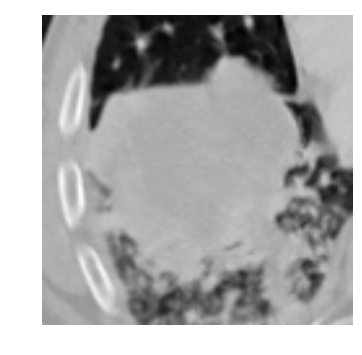

In [122]:
plt.imshow(siko.reshape(120,120) , cmap=plt.cm.Greys_r)
plt.axis('off');

In [9]:
def make3dConvModel(imgSize,count):
    #(samples, rows, cols, channels) if dim_ordering='tf'.
    
    model = Sequential()

    model.add(Convolution3D(48, 1, 1, 1, border_mode='same',dim_ordering='tf',input_shape=[count*2+1,imgSize,imgSize,1] )) # 32
    model.add(Activation('relu'))

    model.add(Convolution3D(48, 2, 1, 1)) # 32
    model.add(Activation('relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2))) ### 
    model.add(Dropout(0.25))

    model.add(Convolution3D(96, 1, 1, 1, border_mode='same')) # 64
    model.add(Activation('relu'))

    model.add(Convolution3D(96, 1, 1 , 1)) # 64
    model.add(Activation('relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(512)) # 512
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    return model

In [10]:
myModel = make3dConvModel(100,2)
myModel.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution3d_17 (Convolution3D) (None, 5, 100, 100, 4 96          convolution3d_input_5[0][0]      
____________________________________________________________________________________________________
activation_21 (Activation)       (None, 5, 100, 100, 4 0           convolution3d_17[0][0]           
____________________________________________________________________________________________________
convolution3d_18 (Convolution3D) (None, 4, 100, 100, 4 4656        activation_21[0][0]              
____________________________________________________________________________________________________
activation_22 (Activation)       (None, 4, 100, 100, 4 0           convolution3d_18[0][0]           
___________________________________________________________________________________________

In [11]:
def make2dConvModel(imgSize):
    #(samples, rows, cols, channels) if dim_ordering='tf'.
    
    model = Sequential()

    model.add(Convolution2D(48, 5, 5, border_mode='same',dim_ordering='tf',input_shape=[imgSize,imgSize,1] )) # 32
    model.add(Activation('relu'))

    model.add(Convolution2D(48, 5, 5)) # 32
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Convolution2D(96, 5, 5, border_mode='same')) # 64
    model.add(Activation('relu'))

    model.add(Convolution2D(96, 5, 5)) # 64
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # this chucnk added - 14
    model.add(Convolution2D(192, 5, 5)) # 64
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512)) # 512
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    return model

In [12]:
make2dConvModel(80).summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 80, 80, 48)    1248        convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_26 (Activation)       (None, 80, 80, 48)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 76, 76, 48)    57648       activation_26[0][0]              
____________________________________________________________________________________________________
activation_27 (Activation)       (None, 76, 76, 48)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [18]:
def make2dConvModel(imgSize):
    #(samples, rows, cols, channels) if dim_ordering='tf'.

    model = Sequential()

    model.add(Convolution2D(32, 7, 7, border_mode='valid',dim_ordering='tf',input_shape=[imgSize,imgSize,1] )) # 32
    model.add(Activation('relu'))

    model.add(Convolution2D(64, 5, 5 , border_mode='valid' )) # 32
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Convolution2D(128, 3, 3, border_mode='valid')) # 64
    model.add(Activation('relu'))

    model.add(Convolution2D(128, 3, 3,  border_mode='valid')) # 64
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    # # this chucnk added - 14
    # model.add(Convolution2D(256, 3, 3)) # 64
    # model.add(Activation('tanh'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(512)) # 512
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    return model

In [19]:
make2dConvModel(80).summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_27 (Convolution2D) (None, 74, 74, 32)    1600        convolution2d_input_9[0][0]      
____________________________________________________________________________________________________
activation_35 (Activation)       (None, 74, 74, 32)    0           convolution2d_27[0][0]           
____________________________________________________________________________________________________
convolution2d_28 (Convolution2D) (None, 70, 70, 64)    51264       activation_35[0][0]              
____________________________________________________________________________________________________
activation_36 (Activation)       (None, 70, 70, 64)    0           convolution2d_28[0][0]           
___________________________________________________________________________________________